In [1072]:
import os
import random

folder_path = "corrector_1/Synthetic_Randomized/shift_synthetic_dataset/"  # Replace with the path to your folder
print(os.path)
corrected_files = []
golden_files = []

# First, loop through all files in the folder and identify the _CORRECTED and _CORRECTED_golden files
for filename in os.listdir(folder_path):
#     print(filename)
    if filename.endswith(".json"):
        if filename.endswith("_CORRECTED_golden.json"):
            
            # If the file ends with "_CORRECTED_golden.json", add it to the golden files list
            golden_files.append(filename)
        elif filename.endswith("_CORRECTED.json"): # --- CHANGE THIS FOR LAST FOLDER
            print("this")
            print(filename)
            # If the file ends with "_CORRECTED.json" but not "_CORRECTED_golden.json", add it to the corrected files list
            corrected_files.append(filename)

if corrected_files:
    for i in range(len(corrected_files)):
        
        if corrected_files[i][0:-5]+"_golden.json" in golden_files:
            corrected_files[i] = "empty"
#             print("did this.")

FINAL_FILES = []
for f in corrected_files:
    if f != 'empty':
        FINAL_FILES.append(f)

if FINAL_FILES:
    filename = FINAL_FILES[0]
    print("Selected File: ", filename)
    print("Files in FINAL_FILES: ", len(FINAL_FILES))
else:
    print("NO FILES REMAINING")
    filename = None
    

<module 'ntpath' (frozen)>
this
shift_error_100_robot_40_CORRECTED.json
this
shift_error_10_robot_31_CORRECTED.json
this
shift_error_20_robot_32_CORRECTED.json
this
shift_error_30_robot_33_CORRECTED.json
this
shift_error_40_robot_34_CORRECTED.json
this
shift_error_50_robot_35_CORRECTED.json
this
shift_error_60_robot_36_CORRECTED.json
this
shift_error_70_robot_37_CORRECTED.json
this
shift_error_80_robot_38_CORRECTED.json
this
shift_error_90_robot_39_CORRECTED.json
Selected File:  shift_error_100_robot_40_CORRECTED.json
Files in FINAL_FILES:  10


In [1073]:
import json
import warnings
warnings.filterwarnings("ignore")

print(golden_files)
correction_1_path = f"{folder_path}{filename}"
print("File 1: ", correction_1_path)
correction_2_path = f"{folder_path.replace('1', '2', 1)}{filename}"
print("File 2: ", correction_2_path + "\n")

# ------ img path ---------------
trial_image = f"{correction_1_path.rsplit('/', 1)[0] + '/'+folder_path.split('/')[-1][9:]}"
original_string = trial_image
parts = original_string.strip('/').split('/')
last_part = parts[-1]
subparts = last_part.split('_')
last_three_subparts = '_'.join(subparts[-3:]) # modify accordingly e.g [-2:] or [-3:]
new_subpart = last_three_subparts + ".png"
parts[-1] = new_subpart
trial_image = trial_image + parts[-1]
# -------------------------------

print("Image: ", trial_image)


correction_1 = open(correction_1_path, 'r')
correction_2 = open(correction_2_path, 'r')

data_1_text = correction_1.read()
data_2_text = correction_2.read()

data_1 = list(json.loads(data_1_text).values())
data_2 = list(json.loads(data_2_text).values())

# data_1

[]
File 1:  corrector_1/Synthetic_Randomized/shift_synthetic_dataset/shift_error_100_robot_40_CORRECTED.json
File 2:  corrector_2/Synthetic_Randomized/shift_synthetic_dataset/shift_error_100_robot_40_CORRECTED.json

Image:  corrector_1/Synthetic_Randomized/shift_synthetic_dataset/shift_synthetic_dataset.png


In [467]:
import emip_toolkit as EMTK


In [1365]:
print(corrected_files)
correction_1_path = str(folder_path + corrected_files[9])
correction_2_path = f"{correction_1_path.replace('1', '2', 1)}"
print(correction_1_path)
print(correction_2_path)


img_path = "./"
trial_image  = "corrector_1/Synthetic_Randomized/shift_synthetic_dataset/synthetic_text.png"
aoi = EMTK.find_aoi(trial_image, img_path, level="sub-line")
aoi.head()

correction_1 = open(correction_1_path, 'r')
correction_2 = open(correction_2_path, 'r')

data_1_text = correction_1.read()
data_2_text = correction_2.read()

data_1 = list(json.loads(data_1_text).values())
data_2 = list(json.loads(data_2_text).values())

['shift_error_100_robot_40_CORRECTED.json', 'shift_error_10_robot_31_CORRECTED.json', 'shift_error_20_robot_32_CORRECTED.json', 'shift_error_30_robot_33_CORRECTED.json', 'shift_error_40_robot_34_CORRECTED.json', 'shift_error_50_robot_35_CORRECTED.json', 'shift_error_60_robot_36_CORRECTED.json', 'shift_error_70_robot_37_CORRECTED.json', 'shift_error_80_robot_38_CORRECTED.json', 'shift_error_90_robot_39_CORRECTED.json']
corrector_1/Synthetic_Randomized/shift_synthetic_dataset/shift_error_90_robot_39_CORRECTED.json
corrector_2/Synthetic_Randomized/shift_synthetic_dataset/shift_error_90_robot_39_CORRECTED.json


In [ ]:
# EMTK.draw_aoi(aoi, trial_image, img_path)

In [1249]:
import correction
#correction.draw_fixation(trial_image, data_2)

In [1331]:
# percentage of fixations that landded on an AOI
percentage, match_list = correction.correction_quality(aoi, data_1, data_1)
print(percentage)

1.0


39 == 39
0.358974358974359


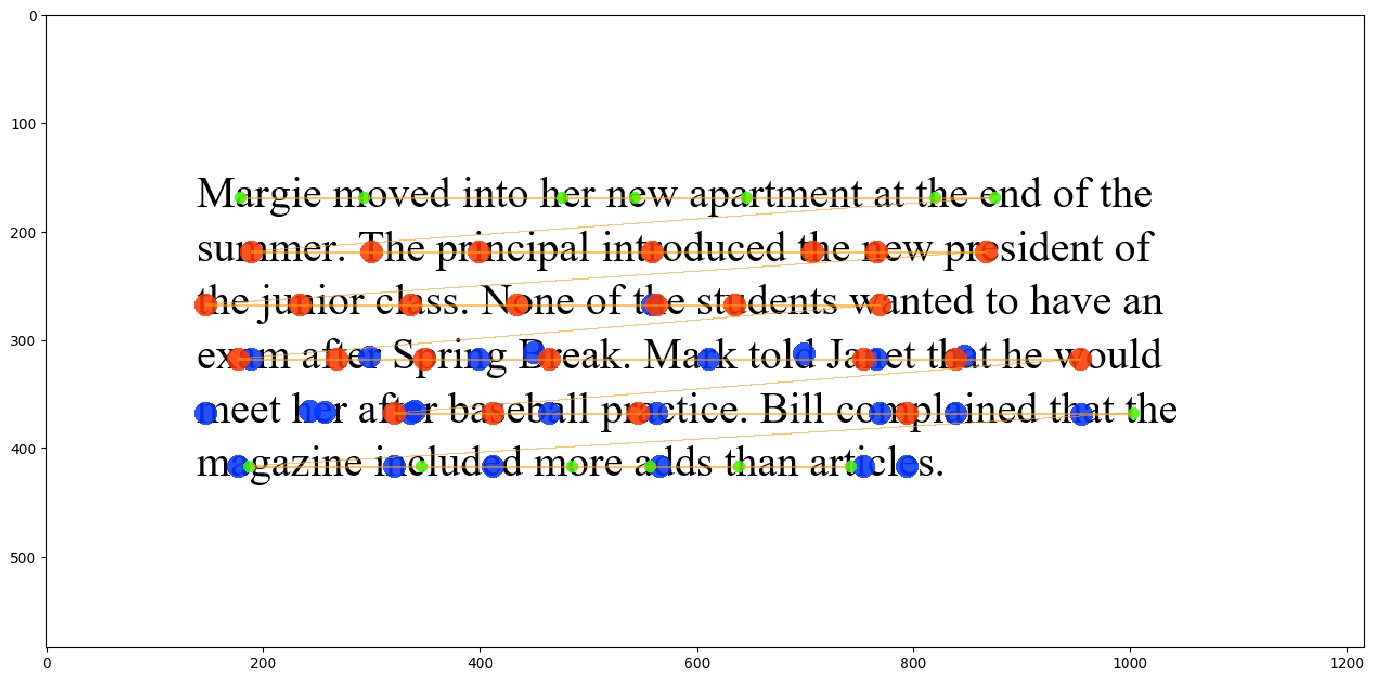

In [1332]:
import correction
# data_1 = data_1[:-1]
print(len(data_1) , "==" , len(data_2))
percentage, match_list = correction.compare_corrections(aoi, data_1, data_2)
print(percentage)
correction.draw_comparison(trial_image, data_1, data_2, match_list)

In [ ]:
# # intentionally adding error 
# #original: [924.48375, 626.0, 96.0]
# data_2[1] = [944.48375, 626.0, 296.0]
# data_2[-1] = [944.48375, 626.0, 296.0]

In [ ]:
# # import correction
# percentage, match_list = correction.compare_corrections(aoi, data_1, data_2)
# print(percentage)
# correction.draw_comparison(trial_image, data_1, data_2, match_list)

# Merging Correction:

In [1333]:
import matplotlib.pyplot as plt
index = 0
results = data_1.copy()

In [1334]:
percentage, match_list = correction.compare_corrections(aoi, data_1, data_2)        

In [1362]:
# Display Fixation
while index < len(match_list):
    if match_list[index] == 0:
        start = 0
        stop = index+1
        correction.draw_comparison(trial_image, data_1[start:stop], data_2[start:stop], match_list[start:stop])
        
        plt.show()
        break
    
    index += 1

# Select Fixation
if index < len(match_list): # who ever was blue obviously did 'correct all' nd had so many wrong ones every time so I am not considering them. red was great.
    print(f'{index}/{len(match_list)}')
    selection = input("Select r for red, b for blue:")

    if selection.lower() == 'r':
        results[index] = data_1[index]
    elif selection.lower() == 'b':
        results[index] = data_2[index]
    if selection.lower() == 'r' or selection == 'b':
        match_list[index] = 2 
    
        
    index += 1
    
if index == len(match_list):
    print("We are done. ")

We are done. 


In [ ]:
# selection = input("Select r for red, b for blue:")
# if selection == 'r':
#     results[index] = data_1[index]
# elif selection == 'b':
#     results[index] = data_2[index]

# index += 1

In [1363]:
import json

data = {}

for index, fixation in enumerate(results):
    data[index] = fixation

output = json.dumps(data)

golden_path = correction_1_path.split('.')[0] + '_golden.json'
out_file = open(golden_path, 'w')

out_file.write(output)
print("File Saved: ", golden_path)
out_file.close()

File Saved:  corrector_1/Synthetic_Randomized/shift_synthetic_dataset/shift_error_90_robot_39_CORRECTED_golden.json
